In [1]:
import numpy as np
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt



import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display

from xgboost import XGBRegressor

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [22]:
#Divede the train, validation and test dataset.
file_handler = open("../pairsDevTrain.txt", "r", encoding="utf-8")

# We must first put the data in a list
train_same = [];
train_diff= [];

for row in file_handler:
    # The values we read are strings, we must convert them to the correct type (float)
    temp=row.replace("\n", "");
    string= temp.split("\t") # split it by whitespace
    converted = [x for x in string]
    if len(converted) ==3:
        #train_same.append( [converted[0],converted[1],converted[0],converted[2] ]);
        train_same.append( converted );
    if len(converted) ==4:
        train_diff.append(converted);
file_handler.close()


file_handler = open("../pairsDevTest.txt", "r", encoding="utf-8")
# We must first put the data in a list
test_same = [];
test_diff= [];

for row in file_handler:
    temp=row.replace("\n", "");
    string= temp.split("\t") # split it by whitespace
    converted = [x for x in string]
    if len(converted) ==3:
        test_same.append( converted );
    if len(converted) ==4:
        test_diff.append(converted);
file_handler.close()

print("There are {} images in the train, {} in the test".format(len(train_same)+ len(train_diff), len(test_same)+ len(test_diff) ) );


vali_same= test_same[0: len(test_same)//2];
test_same= test_same[len(test_same)//2: ];

vali_diff= test_diff[0: len(test_diff)//2];  #notice: should be test_diff
test_diff= test_diff[len(test_diff)//2: ];

There are 2200 images in the train, 1000 in the test


In [24]:
len(train_same), len(train_diff), len( vali_same), len( vali_diff), len( test_same), len( test_diff)

(1100, 1100, 250, 250, 250, 250)

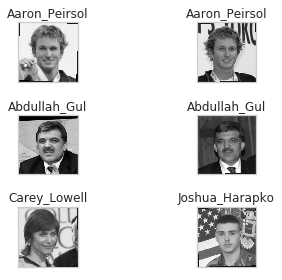

In [5]:
def format_filename(name, number):
    num_zeros = "0"*(4 - len(number))
    filepath = "../lfw2/"+name+"/"+name+"_"+num_zeros+number+".jpg"
    return filepath

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure();
plt.subplot(3, 2, 1)
img=mpimg.imread(format_filename(train_same[0][0], train_same[0][1] )  )
imgplot = plt.imshow(img, cmap='gray')
plt.title(train_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 2)
img=mpimg.imread(format_filename(train_same[0][0], train_same[0][2] )  )
imgplot = plt.imshow(img, cmap='gray')
plt.title(train_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 3)
img=mpimg.imread(format_filename(vali_same[0][0], vali_same[0][1] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(vali_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 4)
img=mpimg.imread(format_filename(vali_same[0][0], vali_same[0][2] )  )
imgplot = plt.imshow(img, cmap='gray')
plt.title(vali_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 5)
img=mpimg.imread(format_filename(test_diff[0][0], test_diff[0][1] )  )
imgplot = plt.imshow(img, cmap='gray')
plt.title(test_diff[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 6)
img=mpimg.imread(format_filename(test_diff[0][2], test_diff[0][3] )  )
imgplot = plt.imshow(img, cmap='gray')
plt.title(test_diff[0][2]);
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

In [6]:
def matrixPosition( matr_in1, matr_in2):
    a= matr_in1.reshape( matr_in1.shape[0]*matr_in1.shape[1] );
    b= matr_in2.reshape( matr_in2.shape[0]*matr_in2.shape[1] );
    c=[ np.array( [x, y]) for x,y in zip(a, b) ];
    c=np.array(c);
    c=c.reshape( matr_in1.shape[0], matr_in1.shape[1], 2 );
    return c;

In [7]:
#Explore the format of image matrix
train_X=[];
train_y=[];
for i in range( len(train_same) ):
#for i in range( 100):
    img1=mpimg.imread(format_filename(train_same[i][0], train_same[i][1] )  );
    img2=mpimg.imread(format_filename(train_same[i][0], train_same[i][2] )  );
    img_lay= matrixPosition(img1, img2);    
    train_X.append(img_lay);
    train_y.append( 1);
    
for i in range( len(train_diff) ):
    img1=mpimg.imread(format_filename(train_diff[i][0], train_diff[i][1] )  );
    img2=mpimg.imread(format_filename(train_diff[i][2], train_diff[i][3] )  );
    img_lay= matrixPosition(img1, img2);    
    train_X.append(img_lay);
    train_y.append( 0);
train_X=np.array(train_X);
train_y=np.array(train_y);

#Explore the format of image matrix
vali_X=[];
vali_y=[];
for i in range( len(vali_same) ):
#for i in range( 30):
    img1=mpimg.imread(format_filename(vali_same[i][0], vali_same[i][1] )  );
    img2=mpimg.imread(format_filename(vali_same[i][0], vali_same[i][2] )  );
    img_lay= matrixPosition(img1, img2);    
    vali_X.append(img_lay);
    vali_y.append( 1);
    
for i in range( len(vali_diff) ):    
#for i in range( 30):
    img1=mpimg.imread(format_filename(vali_diff[i][0], vali_diff[i][1] )  );
    img2=mpimg.imread(format_filename(vali_diff[i][2], vali_diff[i][3] )  );
    img_lay= matrixPosition(img1, img2);    
    vali_X.append(img_lay);
    vali_y.append( 0);
vali_X=np.array(vali_X);
vali_y=np.array(vali_y);

#Explore the format of image matrix
test_X=[];
test_y=[];
for i in range( len(test_same) ):
#for i in range( 30):
    img1=mpimg.imread(format_filename(test_same[i][0], test_same[i][1] )  );
    img2=mpimg.imread(format_filename(test_same[i][0], test_same[i][2] )  );
    img_lay= matrixPosition(img1, img2);    
    test_X.append(img_lay);
    test_y.append( 1);
    
for i in range( len(test_diff) ):    
#for i in range( 30):
    img1=mpimg.imread(format_filename(test_diff[i][0], test_diff[i][1] )  );
    img2=mpimg.imread(format_filename(test_diff[i][2], test_diff[i][3] )  );
    img_lay= matrixPosition(img1, img2);    
    test_X.append(img_lay);
    test_y.append( 0);
test_X=np.array(test_X);
test_y=np.array(test_y);

In [50]:
#Explore the format of image matrix
test_X=[];
test_y=[];
for i in range( len(test_same) ):
#for i in range( 30):
    img1=mpimg.imread(format_filename(test_same[i][0], test_same[i][1] )  );
    img2=mpimg.imread(format_filename(test_same[i][0], test_same[i][2] )  );
    img_lay= matrixPosition(img1, img2);    
    test_X.append(img_lay);
    test_y.append( 1);
    
for i in range( len(test_diff) ):    
#for i in range( 30):
    img1=mpimg.imread(format_filename(test_diff[i][0], test_diff[i][1] )  );
    img2=mpimg.imread(format_filename(test_diff[i][2], test_diff[i][3] )  );
    img_lay= matrixPosition(img1, img2);    
    test_X.append(img_lay);
    test_y.append( 0);
test_X=np.array(test_X);
test_y=np.array(test_y);

In [51]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
#convert type to float 32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
vali_X = vali_X.astype('float32')
train_X = train_X / 255.
vali_X = vali_X / 255.
test_X = test_X / 255.

In [52]:
#convert the target into one-hot encoding vectors
train_y_hot = to_categorical(train_y)
vali_y_hot = to_categorical(vali_y)
test_y_hot = to_categorical(test_y)
# Display the change for category label using one-hot encoding
print('Original label:', train_y[-1])
print('After conversion to one-hot:', train_y_hot[-1])

Original label: 0
After conversion to one-hot: [1. 0.]


In [30]:
train_X.shape,vali_X.shape, test_X.shape, train_y_hot.shape,vali_y_hot.shape, test_y_hot.shape

((2200, 250, 250, 2),
 (500, 250, 250, 2),
 (500, 250, 250, 2),
 (2200, 2),
 (500, 2),
 (500, 2))

In [31]:
#Build the model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 128 #depends on memory
epochs = 20
num_classes = 2

In [32]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(250,250,2),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((4, 4),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))   
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [33]:
#compile the model: Loss function, optimizer, metric
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 250, 250, 32)      608       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 250, 250, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [34]:
fashion_train = fashion_model.fit(train_X, train_y_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(vali_X, vali_y_hot) ) 

Train on 2200 samples, validate on 500 samples
Epoch 1/20
2200/2200 [==============================] - 113s 51ms/step - loss: 0.6938 - acc: 0.4909 - val_loss: 0.7046 - val_acc: 0.5000
Epoch 2/20
2200/2200 [==============================] - 103s 47ms/step - loss: 0.6933 - acc: 0.4895 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 3/20
2200/2200 [==============================] - 108s 49ms/step - loss: 0.6936 - acc: 0.4841 - val_loss: 0.6933 - val_acc: 0.5060
Epoch 4/20
2200/2200 [==============================] - 103s 47ms/step - loss: 0.6930 - acc: 0.5064 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 5/20
2200/2200 [==============================] - 103s 47ms/step - loss: 0.6934 - acc: 0.4945 - val_loss: 0.6963 - val_acc: 0.5000
Epoch 6/20
2200/2200 [==============================] - 102s 46ms/step - loss: 0.6935 - acc: 0.5014 - val_loss: 0.6999 - val_acc: 0.5000
Epoch 7/20
2200/2200 [==============================] - 99s 45ms/step - loss: 0.6935 - acc: 0.4923 - val_loss: 0.6997 - val_acc: 0.

In [39]:
#Save the model to save time
fashion_model.save("fashion_model_dropout.h5py")

In [53]:
#Evaluate the model
test_eval = fashion_model.evaluate(test_X, test_y_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

500/500 [==============================] - 7s 15ms/step
Test loss: 0.6945507216453553
Test accuracy: 0.4959999995231628


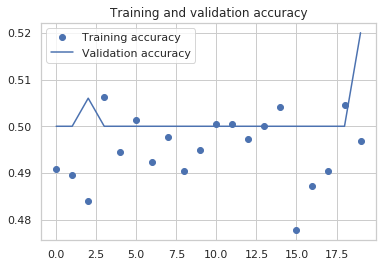

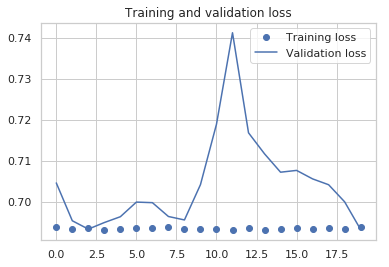

In [54]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:
#Predit labels
predicted_classes = fashion_model.predict(test_X)


In [58]:
predicted_classes[0:9]

array([[0.5269681 , 0.47303194],
       [0.50969243, 0.49030754],
       [0.5087203 , 0.4912797 ],
       [0.51421654, 0.48578343],
       [0.52101356, 0.47898644],
       [0.51861966, 0.48138025],
       [0.5093317 , 0.49066827],
       [0.5047692 , 0.49523076],
       [0.5046208 , 0.4953792 ]], dtype=float32)

In [64]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_y.shape


((500,), (500,))

In [66]:
a=np.where(predicted_classes==test_y);
a

(array([ 44,  53,  91, 110, 112, 134, 200, 235, 236, 238, 239, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265,
        266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
        280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
        293, 294, 295, 297, 298, 299, 301, 302, 303, 304, 305, 306, 308,
        309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
        322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
        335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,
        348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 360, 361,
        362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381, 382, 384, 386, 387, 388, 389,
        390, 391, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403,
        404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
        417, 418, 419, 420, 421, 422, 423, 424, 425

In [67]:

correct = np.where(predicted_classes==test_y)[0]
print ("Found %d correct labels" % len(correct) )

Found 248 correct labels


In [68]:
incorrect = np.where(predicted_classes!=test_y)[0]
print ("Found %d incorrect labels" % len(incorrect) )
#for i, incorrect in enumerate(incorrect[:9]):
#    plt.subplot(3,3,i+1)
#    plt.imshow(test_X[incorrect].reshape(250,250, 2), cmap='gray', interpolation='none')
#    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]) )
#    plt.tight_layout()

Found 252 incorrect labels


In [69]:
#classification report
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      0.95      0.65       250
     Class 1       0.46      0.04      0.08       250

   micro avg       0.50      0.50      0.50       500
   macro avg       0.48      0.50      0.37       500
weighted avg       0.48      0.50      0.37       500

